In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

# Load and Inspect Data

In [2]:
df = pd.read_csv("../input/heart-disease-uci/heart.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["c", "r", "b"])

# Exploratory Data Analysis

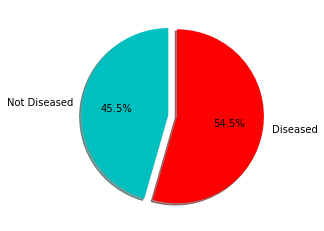

In [8]:
target_count = df['target'].value_counts()
diseased = target_count[0]
non_diseased = target_count[1]
labels = ['Not Diseased', 'Diseased']
sizes = [diseased, non_diseased]
explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

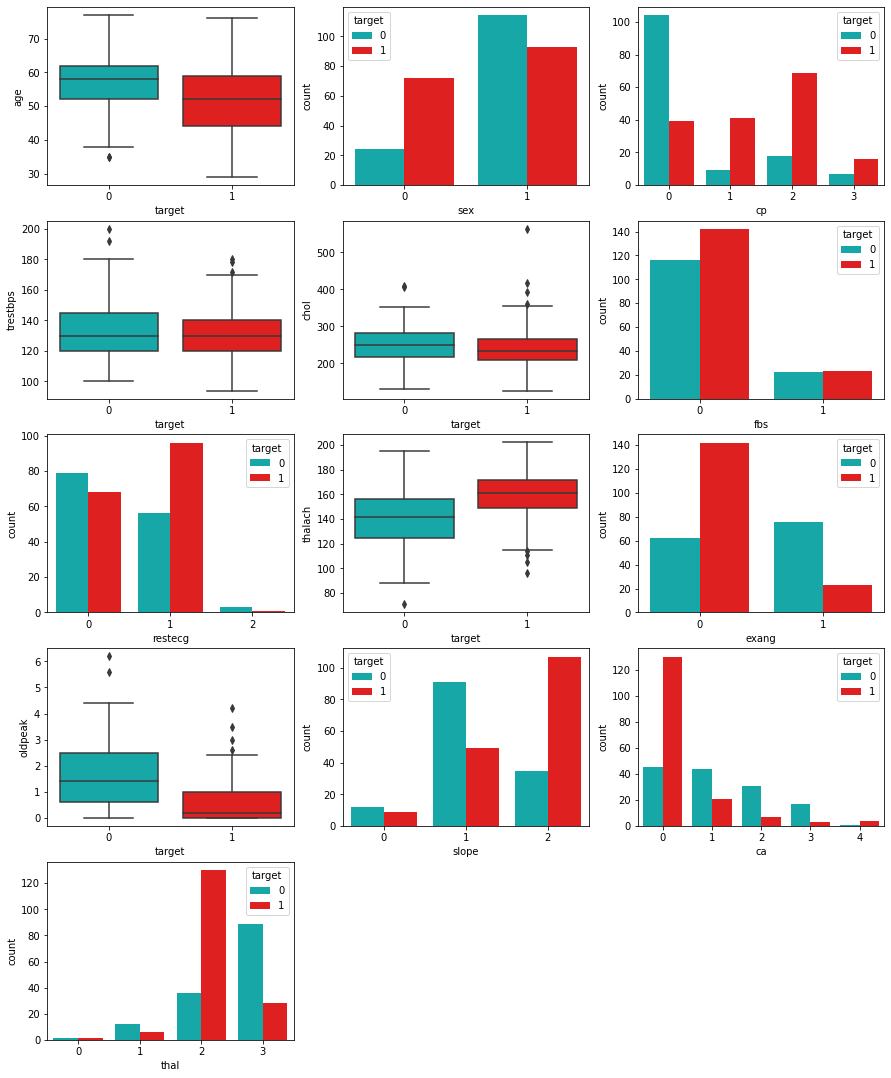

In [9]:
fig, ax = plt.subplots(5,3, figsize=(15,19))
sns.boxplot(data=df, y='age', x='target', ax=ax[0,0])
sns.countplot(df['sex'], hue=df['target'], ax=ax[0,1])
sns.countplot(df['cp'], hue=df['target'], ax=ax[0,2])
sns.boxplot(data=df, y='trestbps', x='target', ax=ax[1,0])
sns.boxplot(data=df, y='chol', x='target', ax=ax[1,1])
sns.countplot(df['fbs'], hue=df['target'], ax=ax[1,2])
sns.countplot(df['restecg'], hue=df['target'], ax=ax[2,0])
sns.boxplot(data=df, y='thalach', x='target', ax=ax[2,1])
sns.countplot(df['exang'], hue=df['target'], ax=ax[2,2])
sns.boxplot(data=df, y='oldpeak', x='target', ax=ax[3,0])
sns.countplot(df['slope'], hue=df['target'], ax=ax[3,1])
sns.countplot(df['ca'], hue=df['target'], ax=ax[3,2])
sns.countplot(df['thal'], hue=df['target'], ax=ax[4,0])
fig.delaxes(ax[4,1])
fig.delaxes(ax[4,2])

<AxesSubplot:>

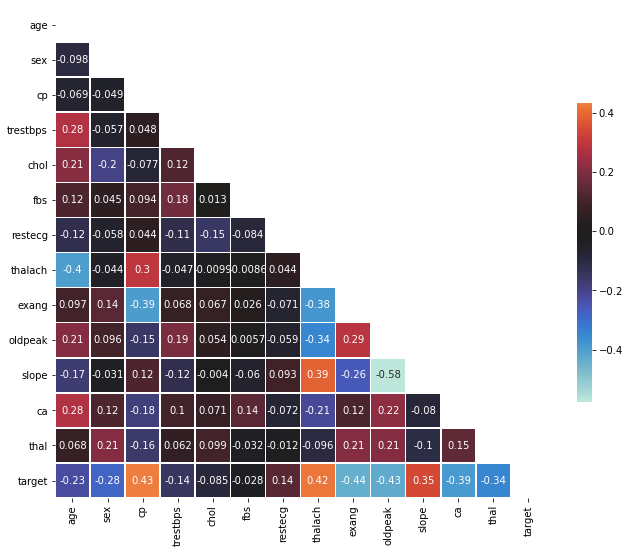

In [10]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

In [11]:
target_corr = corr['target'].drop(['target'], axis=0).sort_values(ascending=False)

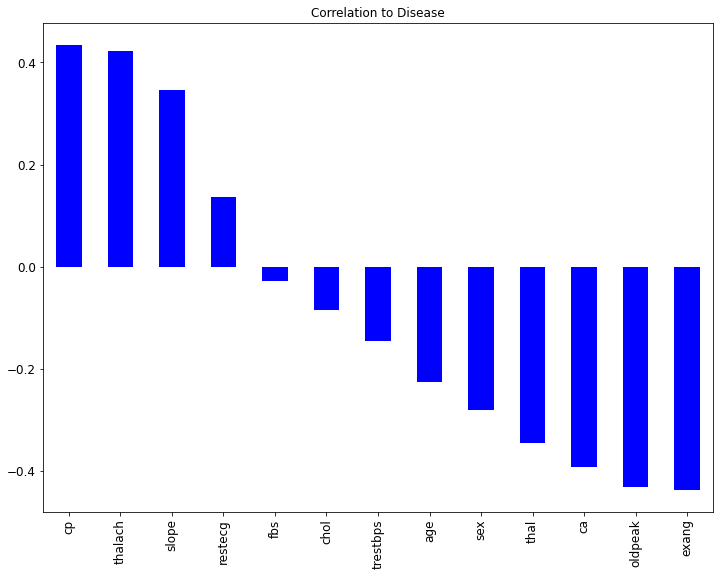

In [12]:
ax = target_corr.plot(kind='bar', title="Correlation to Disease", figsize=(12,9), fontsize=12, color='b')

In [13]:
df1=df

In [14]:
df1['gender'] = df1.groupby(['sex', 'target'])['target'].transform('count')

In [15]:
male_no = df1.query('sex==0 & target==0')['gender'].unique()[0]
male_yes = df1.query('sex==0 & target==1')['gender'].unique()[0]
female_no = df1.query('sex==1 & target==0')['gender'].unique()[0]
female_yes = df1.query('sex==1 & target==1')['gender'].unique()[0]

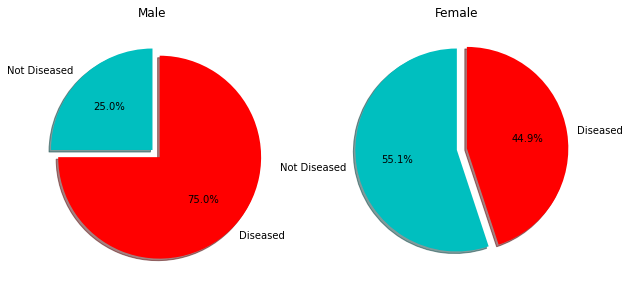

In [16]:
labels = ['Not Diseased', 'Diseased']
sizes_m = [male_no, male_yes]
sizes_f = [female_no, female_yes]
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(10,5))
ax1.pie(sizes_m, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.pie(sizes_f, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.title.set_text('Male')
ax2.title.set_text('Female')

In [17]:
df1['chest_pain'] = df1.groupby(['cp', 'target'])['target'].transform('count')

In [18]:
cp0_no = df1.query('cp==0 & target==0')['chest_pain'].unique()[0]
cp0_yes = df1.query('cp==0 & target==1')['chest_pain'].unique()[0]
cp1_no = df1.query('cp==1 & target==0')['chest_pain'].unique()[0]
cp1_yes = df1.query('cp==1 & target==1')['chest_pain'].unique()[0]
cp2_no = df1.query('cp==2 & target==0')['chest_pain'].unique()[0]
cp2_yes = df1.query('cp==2 & target==1')['chest_pain'].unique()[0]
cp3_no = df1.query('cp==3 & target==0')['chest_pain'].unique()[0]
cp3_yes = df1.query('cp==3 & target==1')['chest_pain'].unique()[0]

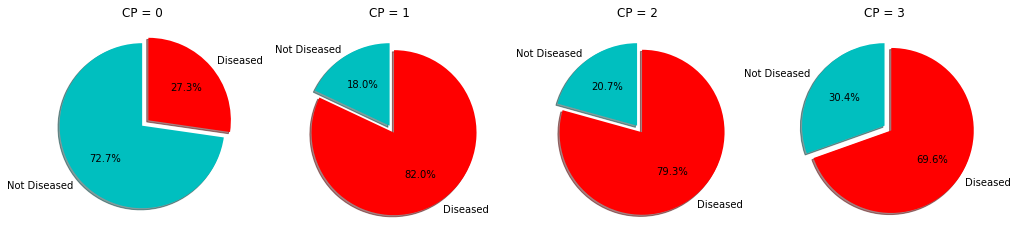

In [19]:
labels = ['Not Diseased', 'Diseased']
sizes_cp0 = [cp0_no, cp0_yes]
sizes_cp1 = [cp1_no, cp1_yes]
sizes_cp2 = [cp2_no, cp2_yes]
sizes_cp3 = [cp3_no, cp3_yes]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize =(17,6))
ax1.pie(sizes_cp0, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.pie(sizes_cp1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.pie(sizes_cp2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax4.pie(sizes_cp3, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.title.set_text('CP = 0')
ax2.title.set_text('CP = 1')
ax3.title.set_text('CP = 2')
ax4.title.set_text('CP = 3')

In [20]:
df1['ex'] = df1.groupby(['exang', 'target'])['target'].transform('count')

In [21]:
ex0_no = df1.query('exang==0 & target==0')['ex'].unique()[0]
ex0_yes = df1.query('exang==0 & target==1')['ex'].unique()[0]
ex1_no = df1.query('exang==1 & target==0')['ex'].unique()[0]
ex1_yes = df1.query('exang==1 & target==1')['ex'].unique()[0]

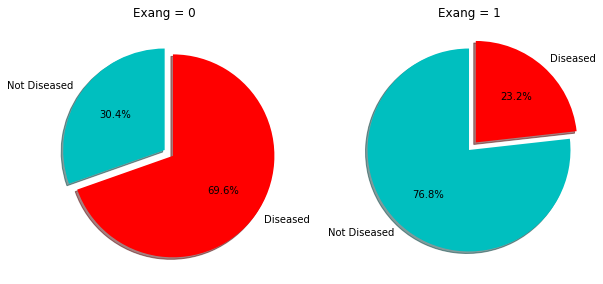

In [22]:
labels = ['Not Diseased', 'Diseased']
sizes_ex0 = [ex0_no, ex0_yes]
sizes_ex1 = [ex1_no, ex1_yes]
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(10,5))
ax1.pie(sizes_ex0, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.pie(sizes_ex1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.title.set_text('Exang = 0')
ax2.title.set_text('Exang = 1')

In [23]:
df1['cg'] = df1.groupby(['restecg', 'target'])['target'].transform('count')

In [24]:
cg0_no = df1.query('restecg==0 & target==0')['cg'].unique()[0]
cg0_yes = df1.query('restecg==0 & target==1')['cg'].unique()[0]
cg1_no = df1.query('restecg==1 & target==0')['cg'].unique()[0]
cg1_yes = df1.query('restecg==1 & target==1')['cg'].unique()[0]
cg2_no = df1.query('restecg==2 & target==0')['cg'].unique()[0]
cg2_yes = df1.query('restecg==2 & target==1')['cg'].unique()[0]

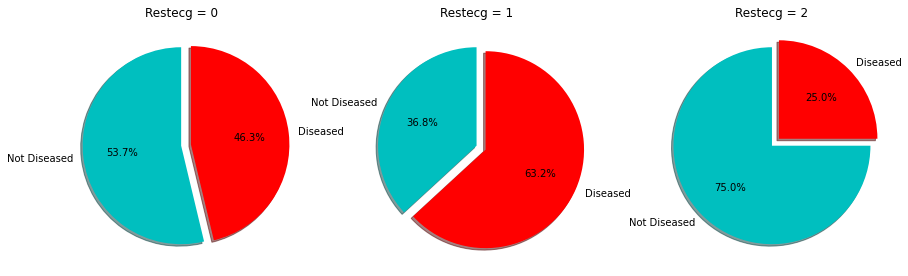

In [25]:
labels = ['Not Diseased', 'Diseased']
sizes_cg0 = [cg0_no, cg0_yes]
sizes_cg1 = [cg1_no, cg1_yes]
sizes_cg2 = [cg2_no, cg2_yes]
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize =(15,5))
ax1.pie(sizes_cg0, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.pie(sizes_cg1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.pie(sizes_cg2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.title.set_text('Restecg = 0')
ax2.title.set_text('Restecg = 1')
ax3.title.set_text('Restecg = 2')

In [26]:
df1['sl'] = df1.groupby(['slope', 'target'])['target'].transform('count')

In [27]:
sl0_no = df1.query('slope==0 & target==0')['sl'].unique()[0]
sl0_yes = df1.query('slope==0 & target==1')['sl'].unique()[0]
sl1_no = df1.query('slope==1 & target==0')['sl'].unique()[0]
sl1_yes = df1.query('slope==1 & target==1')['sl'].unique()[0]
sl2_no = df1.query('slope==2 & target==0')['sl'].unique()[0]
sl2_yes = df1.query('slope==2 & target==1')['sl'].unique()[0]

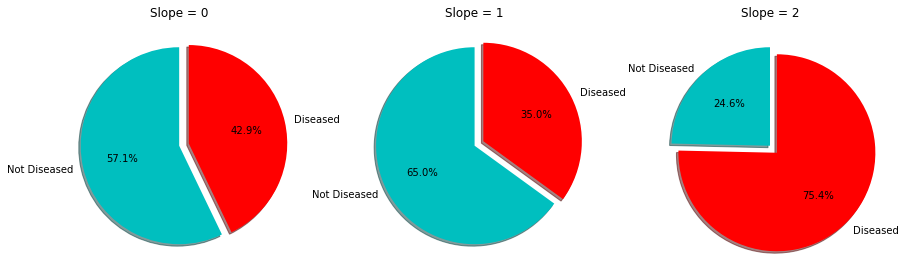

In [28]:
labels = ['Not Diseased', 'Diseased']
sizes_sl0 = [sl0_no, sl0_yes]
sizes_sl1 = [sl1_no, sl1_yes]
sizes_sl2 = [sl2_no, sl2_yes]
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize =(15,5))
ax1.pie(sizes_sl0, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.pie(sizes_sl1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.pie(sizes_sl2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.title.set_text('Slope = 0')
ax2.title.set_text('Slope = 1')
ax3.title.set_text('Slope = 2')

In [29]:
df1['th'] = df1.groupby(['thal', 'target'])['target'].transform('count')

In [30]:
th0_no = df1.query('thal==0 & target==0')['th'].unique()[0]
th0_yes = df1.query('thal==0 & target==1')['th'].unique()[0]
th1_no = df1.query('thal==1 & target==0')['th'].unique()[0]
th1_yes = df1.query('thal==1 & target==1')['th'].unique()[0]
th2_no = df1.query('thal==2 & target==0')['th'].unique()[0]
th2_yes = df1.query('thal==2 & target==1')['th'].unique()[0]
th3_no = df1.query('thal==3 & target==0')['th'].unique()[0]
th3_yes = df1.query('thal==3 & target==1')['th'].unique()[0]

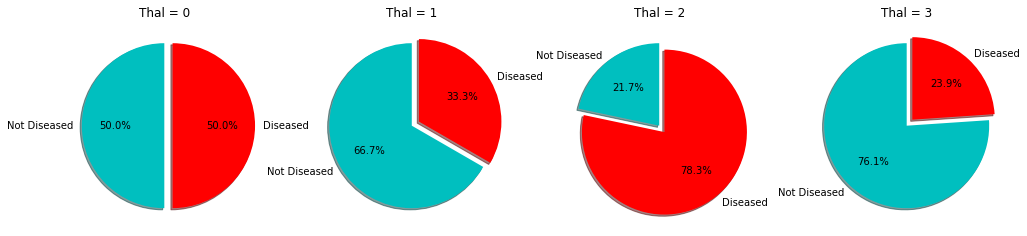

In [31]:
labels = ['Not Diseased', 'Diseased']
sizes_th0 = [th0_no, th0_yes]
sizes_th1 = [th1_no, th1_yes]
sizes_th2 = [th2_no, th2_yes]
sizes_th3 = [th3_no, th3_yes]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize =(17,6))
ax1.pie(sizes_th0, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.pie(sizes_th1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.pie(sizes_th2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax4.pie(sizes_th3, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.title.set_text('Thal = 0')
ax2.title.set_text('Thal = 1')
ax3.title.set_text('Thal = 2')
ax4.title.set_text('Thal = 3')

# Preprocessing

In [32]:
df5 = df1.drop(['chest_pain', 'ex', 'cg', 'sl', 'th'], axis=1)

In [33]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  gender    303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [34]:
df5 = pd.concat([df5, pd.get_dummies(df5['cp'], prefix='chest')], axis=1)
df5 = pd.concat([df5, pd.get_dummies(df5['restecg'], prefix='rcg')], axis=1)
df5 = pd.concat([df5, pd.get_dummies(df5['slope'], prefix='slp')], axis=1)
df5 = pd.concat([df5, pd.get_dummies(df5['ca'], prefix='ca_')], axis=1)
df5 = pd.concat([df5, pd.get_dummies(df5['thal'], prefix='thl')], axis=1)

In [35]:
df5 = df5.drop(['cp','restecg','slope','ca','thal'], axis = 1)

In [36]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   thalach   303 non-null    int64  
 6   exang     303 non-null    int64  
 7   oldpeak   303 non-null    float64
 8   target    303 non-null    int64  
 9   gender    303 non-null    int64  
 10  chest_0   303 non-null    uint8  
 11  chest_1   303 non-null    uint8  
 12  chest_2   303 non-null    uint8  
 13  chest_3   303 non-null    uint8  
 14  rcg_0     303 non-null    uint8  
 15  rcg_1     303 non-null    uint8  
 16  rcg_2     303 non-null    uint8  
 17  slp_0     303 non-null    uint8  
 18  slp_1     303 non-null    uint8  
 19  slp_2     303 non-null    uint8  
 20  ca__0     303 non-null    uint8 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
X = df5.drop(['target'], axis=1)
y = df5['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=9)

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
y_test.value_counts()

1    38
0    23
Name: target, dtype: int64

# K-Nearest Neighbor

In [41]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred, y_test)
print("Nearest Neighbor Accuracy Score: ", knn_acc)

Nearest Neighbor Accuracy Score:  0.819672131147541


Text(0.5, 1.0, 'Nearest Neighbors Confusion Matrix')

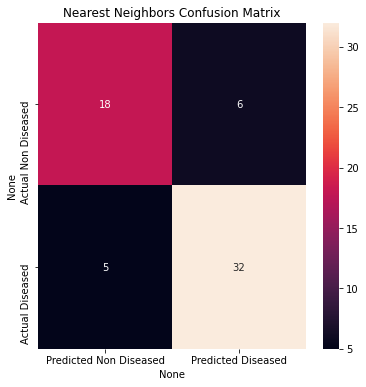

In [42]:
knn_conf = pd.DataFrame(data=confusion_matrix(knn_pred, y_test),
                       columns = [['Predicted Non Diseased', 'Predicted Diseased']],
                       index = [['Actual Non Diseased', 'Actual Diseased']]
                       )
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.heatmap(knn_conf, annot=True)
plt.title("Nearest Neighbors Confusion Matrix")

# Logistic Regression

In [43]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(lr_pred, y_test)
print("Logistic Regression Accuracy Score: ", lr_acc)

Logistic Regression Accuracy Score:  0.8032786885245902


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

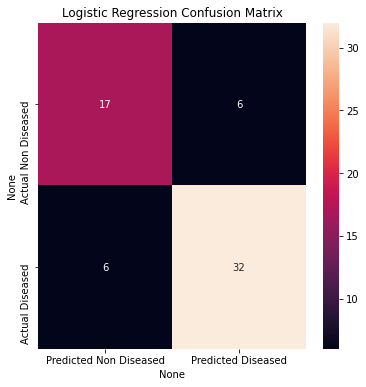

In [44]:
lr_conf = pd.DataFrame(data=confusion_matrix(lr_pred, y_test),
                       columns = [['Predicted Non Diseased', 'Predicted Diseased']],
                       index = [['Actual Non Diseased', 'Actual Diseased']]
                       )
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.heatmap(lr_conf, annot=True)
plt.title("Logistic Regression Confusion Matrix")

# Random Forest Classifier

In [45]:
rf = RandomForestClassifier(n_estimators = 900, max_features=7, random_state = 9)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(rf_pred, y_test)
print("Random Forest Accuracy Score: ", rf_acc)

Random Forest Accuracy Score:  0.9836065573770492


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

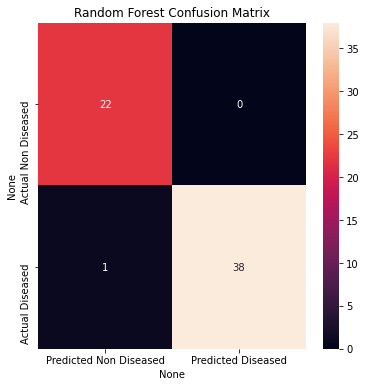

In [46]:
rf_conf = pd.DataFrame(data=confusion_matrix(rf_pred, y_test),
                       columns = [['Predicted Non Diseased', 'Predicted Diseased']],
                       index = [['Actual Non Diseased', 'Actual Diseased']]
                       )
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.heatmap(rf_conf, annot=True)
plt.title("Random Forest Confusion Matrix")

# Support Vector Machine

In [47]:
svc = svm.SVC(kernel='rbf', gamma=.0001, C=15, max_iter=-1)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Support Vector Machine Accuracy Score: ", svc_acc)

Support Vector Machine Accuracy Score:  0.8032786885245902


Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix')

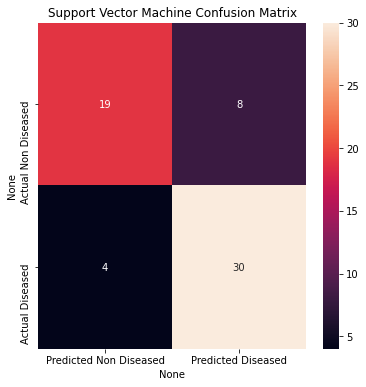

In [48]:
svc_conf = pd.DataFrame(data=confusion_matrix(svc_pred, y_test),
                       columns = [['Predicted Non Diseased', 'Predicted Diseased']],
                       index = [['Actual Non Diseased', 'Actual Diseased']]
                       )
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.heatmap(svc_conf, annot=True)
plt.title("Support Vector Machine Confusion Matrix")

# Neural Network

In [49]:
ann = MLPClassifier(hidden_layer_sizes=(20,35,3), max_iter=4000, random_state=9)
ann.fit(X_train, y_train)
ann_pred = ann.predict(X_test)
ann_acc = accuracy_score(ann_pred, y_test)
print("Artificial Neural Network Accuracy Score: ", ann_acc)

Artificial Neural Network Accuracy Score:  0.8852459016393442


Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix')

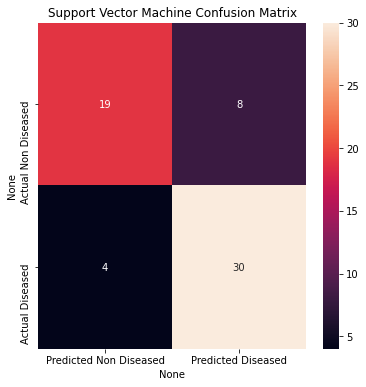

In [50]:
ann_conf = pd.DataFrame(data=confusion_matrix(svc_pred, y_test),
                       columns = [['Predicted Non Diseased', 'Predicted Diseased']],
                       index = [['Actual Non Diseased', 'Actual Diseased']]
                       )
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.heatmap(svc_conf, annot=True)
plt.title("Support Vector Machine Confusion Matrix")

# Model Results

In [51]:
model_results = pd.DataFrame({'Model': ['KNN',
                                       'LR',
                                       'RF',
                                       'SVC',
                                       'ANN'],
                             'Accuracy Scores': [knn_acc,
                                                lr_acc,
                                                rf_acc,
                                                svc_acc,
                                                ann_acc]
                             })

results = model_results.sort_values('Accuracy Scores', ascending=False).set_index('Model')

In [52]:
results.style.background_gradient(cmap='Blues')



,Accuracy Scores
Model,
RF,0.983607
ANN,0.885246
KNN,0.819672
LR,0.803279
SVC,0.803279
